In [1]:
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('datasets/customers.csv')
X = dataset.iloc[:, [3,4]].values

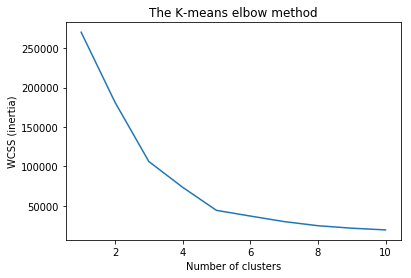

In [3]:
# With the k-means clustering algorithm we are going to cluster
# our dataset into multiple clusters. First we have to find the optimal
# amount of clusters.
wcss = []
# we iterate 10 times to try to find the most optimal amount
# of clusters < 10
for i in range(10):
    amount_of_clusters = i + 1
    # The init argument is used to avoid the K-Mean random init trap.
    kmeans = KMeans(
        n_clusters=amount_of_clusters,
        init='k-means++', 
        max_iter=300, 
        n_init=10
    )
    kmeans = kmeans.fit(X)
    # the WCSS of a kmeans cluster is also called it's inertia.
    wcss.append(kmeans.inertia_)
    
# now visualize the elbow curve
plot.title('The K-means elbow method')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS (inertia)')
plot.plot(range(1, 11), wcss)
plot.show()

In [4]:
# from the above plot we can conclude that the most optimal amount
# of clusters is 5. We will now classify each customer into one of these
# 5 clusters.
clusterer = KMeans(
    n_clusters=5,
    init='k-means++', 
    max_iter=300, 
    n_init=10,
    random_state=0
)
y_clusters = clusterer.fit_predict(X)

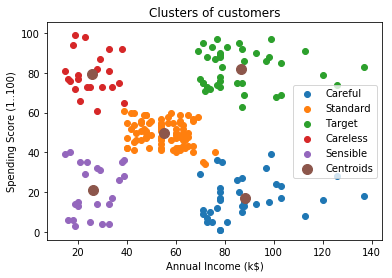

In [5]:
# Visualising each cluster
labels = [
    'Careful',
    'Standard',
    'Target',
    'Careless',
    'Sensible',
]
for i in range(5):
    plot.scatter(
        X[y_clusters == i, 0], X[y_clusters == i, 1],
        label=labels[i]
    )
# and visualize the cluster centeroids
plot.scatter(
    clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1],
    s=100, 
    label='Centroids'
)
plot.title('Clusters of customers')
plot.xlabel('Annual Income (k$)')
plot.ylabel('Spending Score (1..100)')
plot.legend()
plot.show()